# Exploratory data analysis (EDA)

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../data/raw/owid-covid-data.csv')


In [11]:
# Drop all rows where date is not equal to 01.10.2020
data.drop(data[data['date'] != "2020-10-01"].index, inplace = True)

### Rows to consider dropping: 
- World
- International

In [12]:
# Drop rows
data.drop(data[data['location'] == "World"].index, inplace = True) 
data.drop(data[data['location'] == "International"].index, inplace = True)

### Columns to consider dropping: 
- aged_65_older
- continent
- date
- *iso_code*
- *location*
- new_cases
- new_cases_smoothed
- new_cases_smoothed_per_millionnew_deaths_per_million
- new_deaths
- new_deaths_smoothed_per_million
- new_deaths_smoothednew_cases_per_million
- new_tests
- new_tests_per_thousand
- new_tests_smoothed
- new_tests_smoothed_per_thousand
- tests_units
- total_cases
- total_deaths
- total_tests
- tests_per_case
- positive_rage

In [13]:
# Drop columns except location
data.drop(['aged_65_older', 'continent', 'date', 'new_cases', 'new_cases_per_million', 'new_cases_smoothed', 'new_cases_smoothed_per_million', 'new_deaths', 'new_deaths_per_million', 'new_deaths_smoothed', 'new_deaths_smoothed_per_million', 'new_tests', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'total_cases', 'total_deaths', 'total_tests', 'tests_per_case', 'positive_rate', 'population'], axis=1, inplace=True)

# Save locations and clean data for later refrence
data['location'].to_csv('../data/raw/locations.csv', index=False)
data.to_csv('../data/clean/clean.csv', index=False)

# Drop location
data.drop(['location', 'iso_code'], axis=1, inplace=True)

In [14]:
data.shape

(210, 17)

### Missing values & Impute our data to remove any NaN

We see that we are missing a substantial amount of values for total_test_per_thousand, handwashing_facilities, and extreme_poverty. These features should be dropped as any imputation of the values might create unrealistic values. 
The extreme_poverty feature is also baked into human_development_index, which makes it somewhat redundant. This can therefore be dropped without any problems.

In [16]:
data.isnull().sum()

total_cases_per_million         1
total_deaths_per_million       20
total_tests_per_thousand      126
stringency_index               37
population_density             11
median_age                     24
aged_70_older                  25
gdp_per_capita                 27
extreme_poverty                89
cardiovasc_death_rate          25
diabetes_prevalence            17
female_smokers                 70
male_smokers                   72
handwashing_facilities        119
hospital_beds_per_thousand     46
life_expectancy                 3
human_development_index        30
dtype: int64

In [18]:
data.drop(['total_tests_per_thousand', 'handwashing_facilities', 'extreme_poverty'], axis=1, inplace=True)

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(data)

IterativeImputer(random_state=0)

In [20]:
imputed_df = imp_mean.transform(data)
data = pd.DataFrame(imputed_df, columns=data.columns)

### Scale data

array([[<AxesSubplot:title={'center':'total_cases_per_million'}>,
        <AxesSubplot:title={'center':'total_deaths_per_million'}>,
        <AxesSubplot:title={'center':'stringency_index'}>,
        <AxesSubplot:title={'center':'population_density'}>,
        <AxesSubplot:title={'center':'median_age'}>,
        <AxesSubplot:title={'center':'aged_70_older'}>,
        <AxesSubplot:title={'center':'gdp_per_capita'}>],
       [<AxesSubplot:title={'center':'cardiovasc_death_rate'}>,
        <AxesSubplot:title={'center':'diabetes_prevalence'}>,
        <AxesSubplot:title={'center':'female_smokers'}>,
        <AxesSubplot:title={'center':'male_smokers'}>,
        <AxesSubplot:title={'center':'hospital_beds_per_thousand'}>,
        <AxesSubplot:title={'center':'life_expectancy'}>,
        <AxesSubplot:title={'center':'human_development_index'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

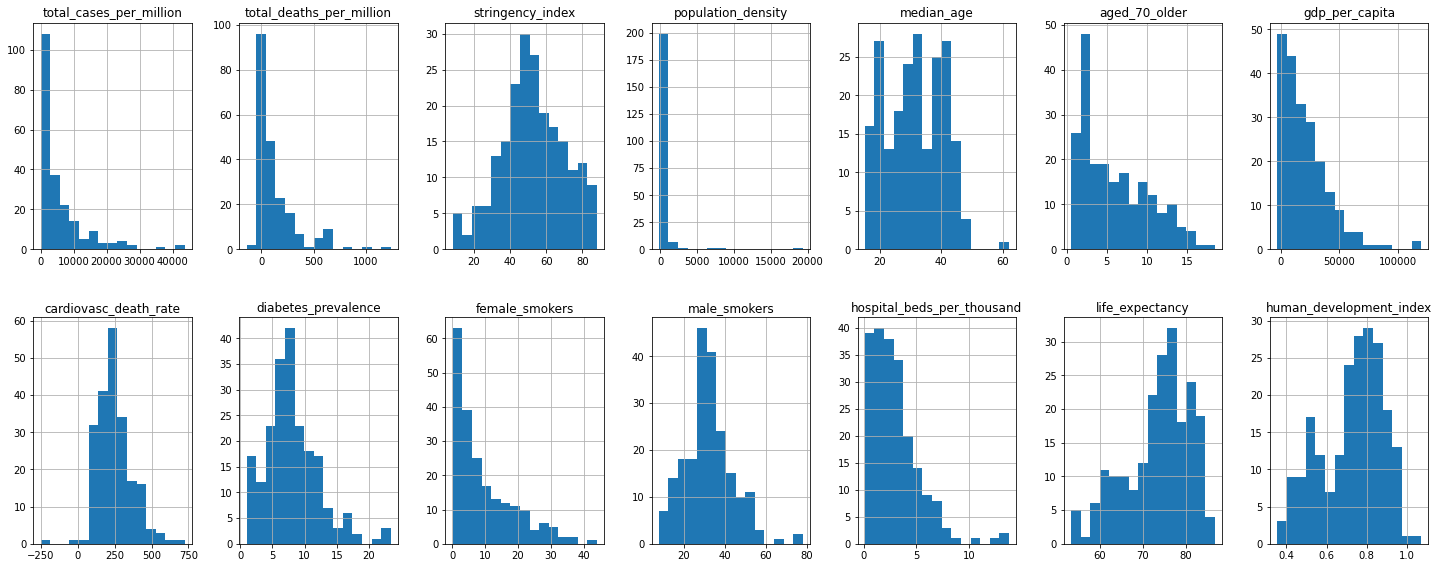

In [21]:
categorical = np.array(data.columns)
data[categorical].hist(bins=15, figsize=(25, 15), layout=(3, 7))

In [22]:
from sklearn import preprocessing


x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=data.columns)

In [23]:
data.describe()

,total_cases_per_million,total_deaths_per_million,stringency_index,population_density,median_age,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.127787,0.198310,0.554464,0.030134,0.349180,0.302494,0.196533,0.513108,0.318461,0.217470,0.347470,0.211243,0.604987,0.520128
std,0.171992,0.143928,0.222152,0.078616,0.196370,0.233743,0.164260,0.120807,0.182585,0.210296,0.163392,0.166465,0.224263,0.215892
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013442,0.111943,0.425431,0.013351,0.175733,0.091181,0.070689,0.433588,0.201833,0.055657,0.247159,0.089051,0.485285,0.356041
50%,0.063615,0.141750,0.541130,0.016234,0.356937,0.236489,0.152488,0.502589,0.280063,0.140007,0.333750,0.176642,0.650433,0.559891
75%,0.176337,0.231221,0.715960,0.023258,0.523447,0.493599,0.276320,0.573207,0.406348,0.333147,0.427202,0.281044,0.766283,0.696723
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'total_cases_per_million'}>,
        <AxesSubplot:title={'center':'total_deaths_per_million'}>,
        <AxesSubplot:title={'center':'stringency_index'}>,
        <AxesSubplot:title={'center':'population_density'}>,
        <AxesSubplot:title={'center':'median_age'}>,
        <AxesSubplot:title={'center':'aged_70_older'}>,
        <AxesSubplot:title={'center':'gdp_per_capita'}>],
       [<AxesSubplot:title={'center':'cardiovasc_death_rate'}>,
        <AxesSubplot:title={'center':'diabetes_prevalence'}>,
        <AxesSubplot:title={'center':'female_smokers'}>,
        <AxesSubplot:title={'center':'male_smokers'}>,
        <AxesSubplot:title={'center':'hospital_beds_per_thousand'}>,
        <AxesSubplot:title={'center':'life_expectancy'}>,
        <AxesSubplot:title={'center':'human_development_index'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

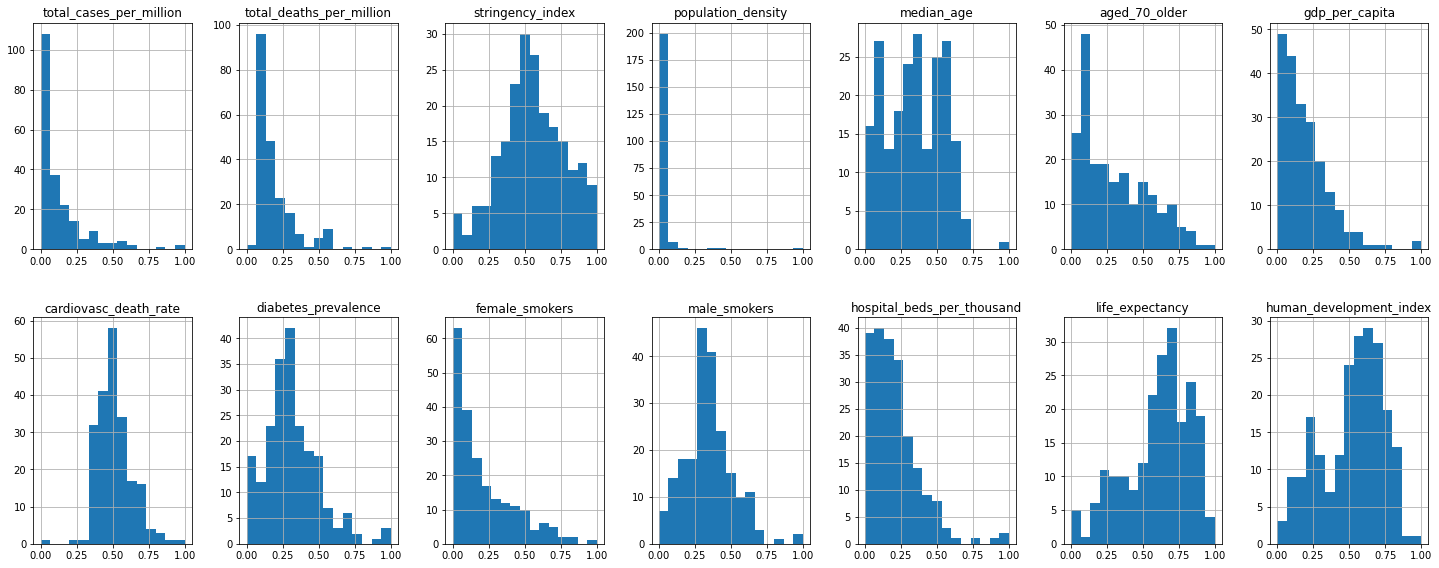

In [24]:
data[categorical].hist(bins=15, figsize=(25, 15), layout=(3, 7))

<AxesSubplot:>

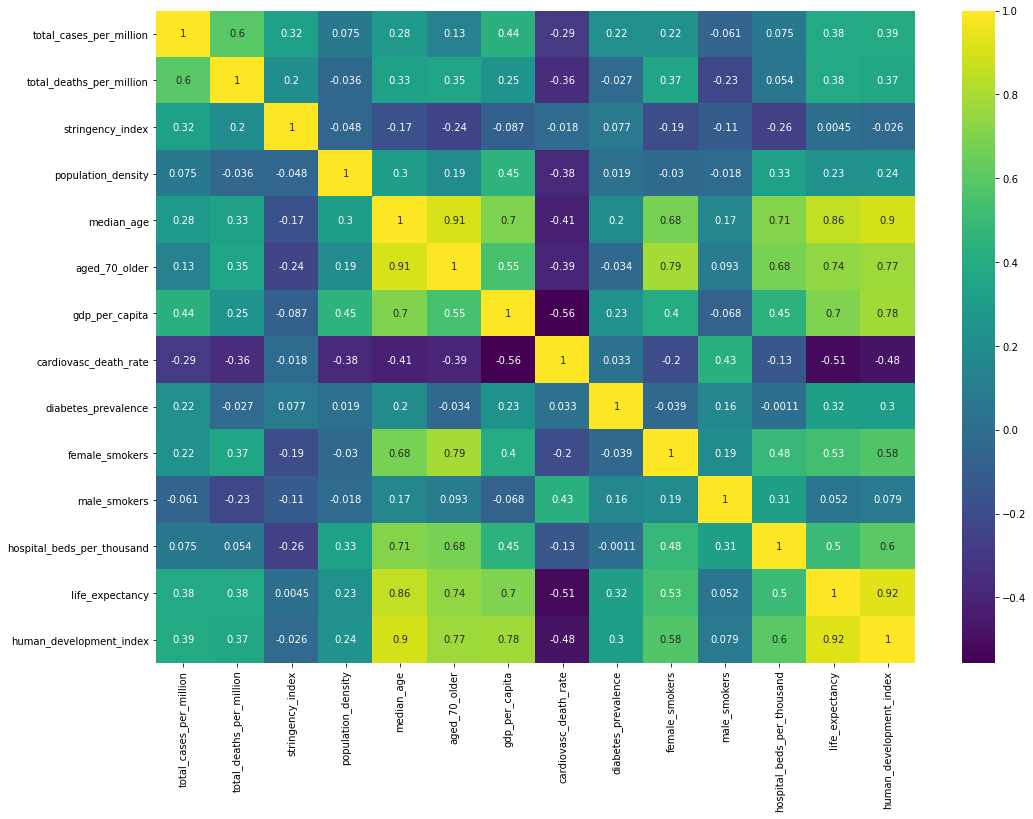

In [25]:
plt.figure(figsize=(17, 12))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [26]:
data.describe()

,total_cases_per_million,total_deaths_per_million,stringency_index,population_density,median_age,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.127787,0.198310,0.554464,0.030134,0.349180,0.302494,0.196533,0.513108,0.318461,0.217470,0.347470,0.211243,0.604987,0.520128
std,0.171992,0.143928,0.222152,0.078616,0.196370,0.233743,0.164260,0.120807,0.182585,0.210296,0.163392,0.166465,0.224263,0.215892
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013442,0.111943,0.425431,0.013351,0.175733,0.091181,0.070689,0.433588,0.201833,0.055657,0.247159,0.089051,0.485285,0.356041
50%,0.063615,0.141750,0.541130,0.016234,0.356937,0.236489,0.152488,0.502589,0.280063,0.140007,0.333750,0.176642,0.650433,0.559891
75%,0.176337,0.231221,0.715960,0.023258,0.523447,0.493599,0.276320,0.573207,0.406348,0.333147,0.427202,0.281044,0.766283,0.696723
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
data_weighted = data.copy()

data_weighted[['total_cases_per_million', 'total_deaths_per_million','stringency_index']] = data_weighted[['total_cases_per_million', 'total_deaths_per_million','stringency_index']]*2

In [28]:
data.to_csv('../data/processed/processed.csv', index=False)
data_weighted.to_csv('../data/processed/processed_weighted.csv', index=False)